# exploratory-data-analysis-on-google-playstore-apps

Google Playstore  serves as the official app store for certified devices running on the Android operating system, allowing users to browse and download applications. So I got this Playstore data for further data analysis. In this EDA, I will explore the Google Playstore dataset through visualizations and graphs using matplotlib and seaborn.

## Package Install and Import

First, we will install and import necessary packages

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/lava18/google-play-store-apps'

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./google-play-store-apps" (use force=True to force download)


In [4]:
data_dir = './google-play-store-apps'

In [5]:
import os
os.listdir(data_dir)

['googleplaystore.csv', 'googleplaystore_user_reviews.csv', 'license.txt']

In [6]:
import jovian
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

## Loading the Dataset

Now we are ready to load the dataset. We will do this using the standard read_csv command from Pandas. Let's take a glimpse at how the data looks like.

In [7]:
google_playstore_apps_df = pd.read_csv('./google-play-store-apps/googleplaystore.csv')

In [8]:
google_playstore_apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
google_playstore_apps_df.shape

(10841, 13)

#### Description of Dataset
We are going to use a simple csv file "Playstore.csv", available on Kaggle.

1) App = Name of the App

2) Category = Category under which the App falls.

3) Rating = Application's rating on playstore.

4) Reviews = Number of reviews of the App.

5) Size = Size of the App.

6) Installs = Number of Installation of the App.

7) Type = If the App is free/paid.

8) Price = Price of the App (0 if it is Free).

9) Content Rating = Appropiate Target Audience of the App.

10) Genres = Genre under which the App falls.

11) Last Updated = Date when the App was last updated.

12) Current Ver = Current Version of the App.

13) Android Ver = Minimum Android Version required to run the App.

After a quick glimpse at the dataset, it looks like a typical apps dataset. We can also see that there are null values in some columns.

Let us save and upload our work to Jovian before continuing.

In [10]:
project_name = "exploratory-data-analysis-on-google-playstore-apps"

In [11]:
!pip install jovian --upgrade -q

In [12]:
import jovian

In [13]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sagarrajput1412/exploratory-data-analysis-on-google-playstore-apps" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sagarrajput1412/exploratory-data-analysis-on-google-playstore-apps


'https://jovian.ai/sagarrajput1412/exploratory-data-analysis-on-google-playstore-apps'

## Data Preparation and Cleaning

Second, we will start preparation for cleaning the data. 

In [14]:
google_playstore_apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


There are 10841 entries and 13 columns to work with for EDA. There are a few columns that contain null values ('Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver').

In [15]:
google_playstore_apps_df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

We can see that for each of the columns, there are a lot different, unique values for some of them. It makes sense that the App is large since it is a unique key used to identify the App, followed by Category, Content Rating, Genres, Current Ver and Android Ver also have unique values as well.

## Handling Null Values

In this step, Null Values are identified and further cleared by elimination, addition or by replacement.

In [16]:
google_playstore_apps_df.isnull().values.any()

True

In [17]:
google_playstore_apps_df.isnull().sum().sum()

1487

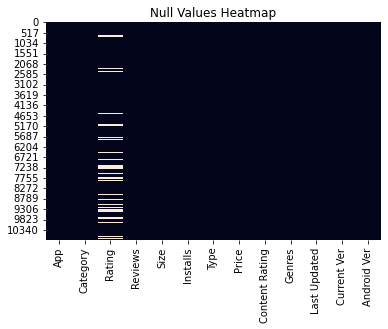

In [18]:
sns.heatmap(google_playstore_apps_df.isnull(), cbar = False)
plt.title('Null Values Heatmap')
plt.show()

In [19]:
google_playstore_apps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Above in the heatmap and table, we can see that there are quite a few null values in the dataset. There are a total of 1487 null values across the entire dataset with 1474 missing points under 'Rating', 1 under 'Type', 1 under 'Content Rating', 8 under 'Current Ver', and 3 under 'Android Ver'. We will have to handle all null data points before we can dive into EDA and modeling.

In [20]:
google_playstore_apps_df['Rating'].fillna('1.0', inplace=True)
google_playstore_apps_df.dropna(subset=['Type','Content Rating','Current Ver','Android Ver'],inplace=True)

In [21]:
google_playstore_apps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

For null values, the easiest way to get rid of them would be to delete the rows with the missing data. However, this wouldn't be beneficial to our EDA since there is a loss of information. Since 'Rating' contain the majority of null values, I will choose to treat each missing value as with least rating that is 1.0 and the rest columns with null values will be dropped off. After, we can see that there are no more null values in the dataset.

## Remove Duplicate data

In [22]:
google_playstore_apps_df.duplicated().sum()

483

In [23]:
google_playstore_apps_df.drop_duplicates(inplace = True)

In [24]:
google_playstore_apps_df.shape

(10346, 13)

After removing 483 duplicate value entries, there are 10346 entries and 13 columns to work with for EDA.

## Checking Datatype of each Column

In [25]:
google_playstore_apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             10346 non-null  object
 1   Category        10346 non-null  object
 2   Rating          10346 non-null  object
 3   Reviews         10346 non-null  object
 4   Size            10346 non-null  object
 5   Installs        10346 non-null  object
 6   Type            10346 non-null  object
 7   Price           10346 non-null  object
 8   Content Rating  10346 non-null  object
 9   Genres          10346 non-null  object
 10  Last Updated    10346 non-null  object
 11  Current Ver     10346 non-null  object
 12  Android Ver     10346 non-null  object
dtypes: object(13)
memory usage: 1.1+ MB


It is necessary to check datatype of each column, so as to identify which columns with respective values are in need to convert into integers because it will make the Eda easier.

## Data Preparation

Data preparation is the process of cleaning, transforming and restructuring data so that users can use it for analysis, business intelligence and visualization. In the given information, we can see that all dtypes are object which needs the necessary columns to be converted into an integer or float followed by uniform value columns and removal of unnecessary values in the column.

In [26]:
# For Rating

In [27]:
google_playstore_apps_df[["Rating"]] = google_playstore_apps_df[["Rating"]].apply(pd.to_numeric)

In [28]:
# For Reviews

In [29]:
google_playstore_apps_df[["Reviews"]] = google_playstore_apps_df[["Reviews"]].apply(pd.to_numeric)

In [30]:
google_playstore_apps_df = google_playstore_apps_df.sort_values(by ='Reviews', ascending = False, ignore_index = True)

In [31]:
google_playstore_apps_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
1,Facebook,SOCIAL,4.1,78128208,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
2,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3,WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
4,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [32]:
google_playstore_apps_df = google_playstore_apps_df.drop_duplicates(subset=['App'], keep='first', ignore_index=True)

In [33]:
google_playstore_apps_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
1,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
4,Clash of Clans,GAME,4.6,44893888,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up


In [34]:
# For Size

In [35]:
google_playstore_apps_df['Size'] = google_playstore_apps_df['Size'].str.replace('Varies with device', '0')

In [36]:
google_playstore_apps_df['Size'] = google_playstore_apps_df.iloc[0:9648,4].replace({'k':'*1024','M':'*1024*1024'}, regex=True)

In [37]:
google_playstore_apps_df['Size'] = google_playstore_apps_df['Size'].map(pd.eval).astype(int)

In [38]:
google_playstore_apps_df.dtypes['Size']

dtype('int64')

In [39]:
google_playstore_apps_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Facebook,SOCIAL,4.1,78158306,0,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
1,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2,Instagram,SOCIAL,4.5,66577446,0,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,0,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
4,Clash of Clans,GAME,4.6,44893888,102760448,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up


In [40]:
google_playstore_apps_df.shape

(9648, 13)

In [41]:
# For Installs

In [42]:
google_playstore_apps_df['Installs'] = google_playstore_apps_df['Installs'].str.strip('+')

In [43]:
google_playstore_apps_df['Installs'] = google_playstore_apps_df['Installs'].str.replace(',', '')

In [44]:
google_playstore_apps_df[["Installs"]] = google_playstore_apps_df[["Installs"]].apply(pd.to_numeric)

In [45]:
google_playstore_apps_df.dtypes['Installs']

dtype('int64')

In [46]:
google_playstore_apps_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2697,Five Nights at Freddy's 4,GAME,4.6,21266,47185920,100000,Paid,$2.99,Teen,Action,"July 26, 2015",1.1,2.3 and up
9230,Training course: Learn Nursing,MEDICAL,1.0,0,7340032,100,Free,0,Everyone,Medical,"July 8, 2018",1.0.0,4.1 and up
4435,Basket Manager 2016 Free,SPORTS,4.3,1879,4613734,100000,Free,0,Everyone,Sports,"February 9, 2017",2.9,4.1 and up
1311,K PLUS,FINANCE,4.4,124424,0,10000000,Free,0,Everyone,Finance,"June 26, 2018",4.6.0,4.2 and up
2147,FREEDOME VPN Unlimited anonymous Wifi Security,TOOLS,4.3,39833,10380902,1000000,Free,0,Everyone,Tools,"July 9, 2018",2.5.1.7592,4.0.3 and up


In [47]:
# For Price

In [48]:
google_playstore_apps_df['Price'] = google_playstore_apps_df['Price'].str.strip('$')

In [49]:
google_playstore_apps_df[["Price"]] = google_playstore_apps_df[["Price"]].apply(pd.to_numeric)

In [50]:
google_playstore_apps_df.dtypes['Price']

dtype('float64')

In [51]:
# Dropping Unnecessary Columns

In [52]:
google_playstore_apps_df.drop(['Last Updated','Current Ver','Android Ver'], axis = 1, inplace = True)

In [53]:
# Data Information

In [54]:
google_playstore_apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   int64  
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 753.9+ KB


The above result is obtained after data preparation and cleaning.

## Exploratory Analysis and Visualization

Exploratory Data Analysis is a process of describing the data by means of statistical and visualization techniques in order to bring important aspects of that data into focus for further analysis. First, we will begin analysis on the entire Google Playstore data set consisting of all the elements after data preparation and cleaning. Revisiting the data, let us see how it looked like again.

In [55]:
google_playstore_apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Facebook,SOCIAL,4.1,78158306,0,1000000000,Free,0.0,Teen,Social
1,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0,1000000000,Free,0.0,Everyone,Communication
2,Instagram,SOCIAL,4.5,66577446,0,1000000000,Free,0.0,Teen,Social
3,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,0,1000000000,Free,0.0,Everyone,Communication
4,Clash of Clans,GAME,4.6,44893888,102760448,100000000,Free,0.0,Everyone 10+,Strategy
...,...,...,...,...,...,...,...,...,...,...
9643,Dete.bg,NEWS_AND_MAGAZINES,1.0,0,30408704,100,Free,0.0,Everyone,News & Magazines
9644,EG Groups,EVENTS,1.0,0,1153433,10,Free,0.0,Everyone,Events
9645,EG Way Life,SOCIAL,1.0,0,1153433,50,Free,0.0,Everyone,Social
9646,qEG APP / Química EG SRL,TOOLS,1.0,0,120832,10,Free,0.0,Everyone,Tools


In [56]:
sns.set_style('whitegrid')

Before we can ask interesting questions about the dataset, it would help to understand what the categories, Types, no of installs, genres of the Apps look like. It's important to explore these variables in order to understand the dataset.

### Category

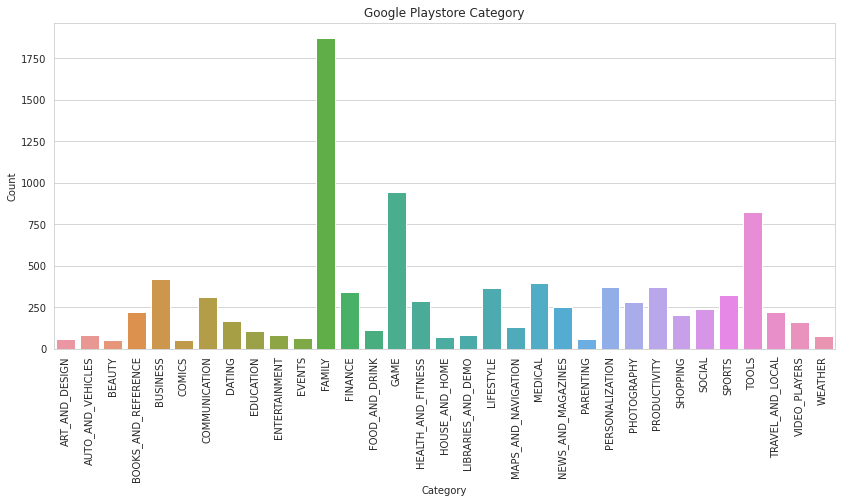

In [57]:
plt.figure(figsize=(14,6))
category_df = google_playstore_apps_df.Category.sort_values(ascending=True)
sns.countplot(x = category_df);
plt.title('Google Playstore Category')
plt.xticks(rotation = 90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

It appears that most of the Apps in the play store belongs to Family and Gaming categories, followed by Tools, Medical and Business

In [58]:
app_count = google_playstore_apps_df.groupby(['Category','Type'])[['App']].count().reset_index()
app_count_df = app_count.pivot('Category', 'Type', 'App').reset_index()

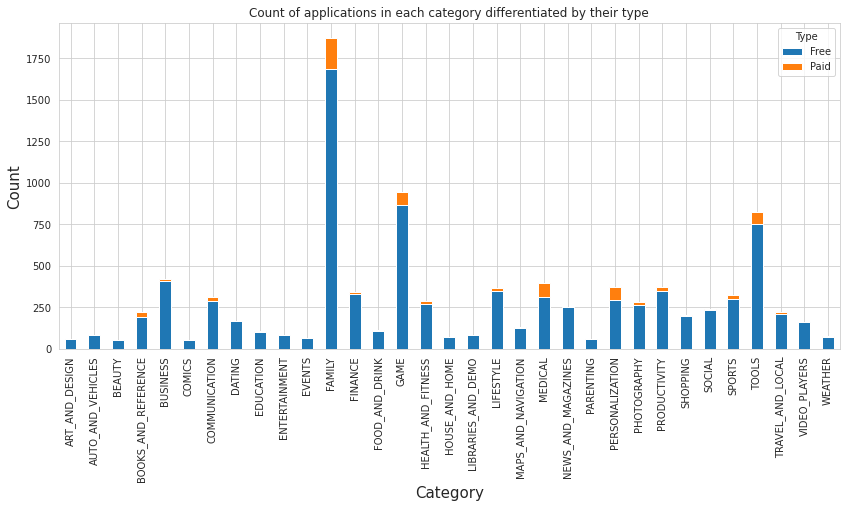

In [59]:
app_count_df.set_index('Category').plot(kind='bar', stacked=True, figsize=(14,6))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

It looks like certain app categories have more free apps available for download than others. In our dataset, the majority of apps in Family, Game, Tools, as well as Business categories were free to install. At the same time Family, Game, Tools, Medical and Personalization categories had the biggest number of paid apps available for download.

### Rating

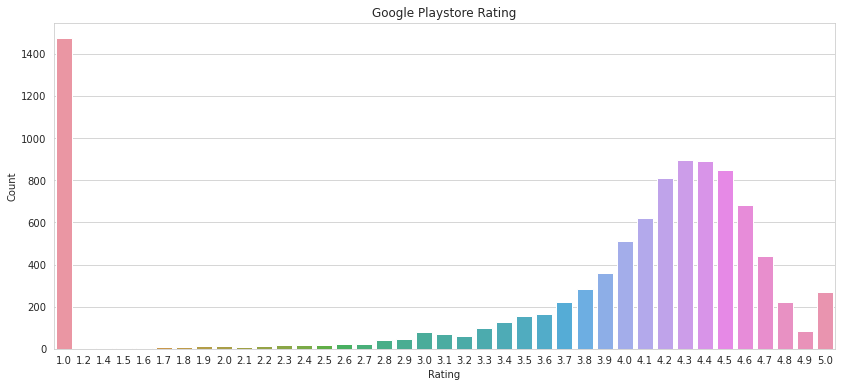

In [60]:
plt.figure(figsize=(14,6))
rating_df = google_playstore_apps_df.Rating
sns.countplot(x = rating_df);
plt.title('Google Playstore Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In the above graph, we can see no. of app counts in the increasing manner with respect to Ratings. The rating one represents the unrated group of apps.

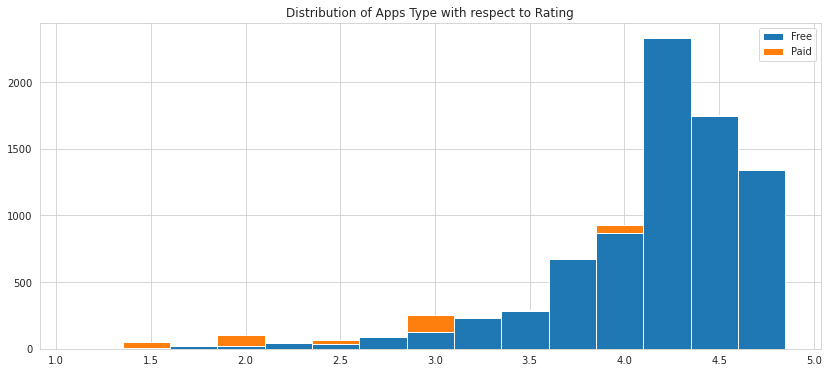

In [61]:
plt.figure(figsize=(14,6))
plt.title('Distribution of Apps Type with respect to Rating')

plt.hist([google_playstore_apps_df.Rating, google_playstore_apps_df.Price], 
         bins=np.arange(1.1, 5, 0.25), 
         stacked=True);

plt.legend(['Free', 'Paid']);

It appears that large group of users have given the rating in range of 2.8 to 4.8. At the same time rating 1.5, 2.0, 2.5, 3.0 and 4.0 had the biggest number of rated paid apps available for download.

### Installs

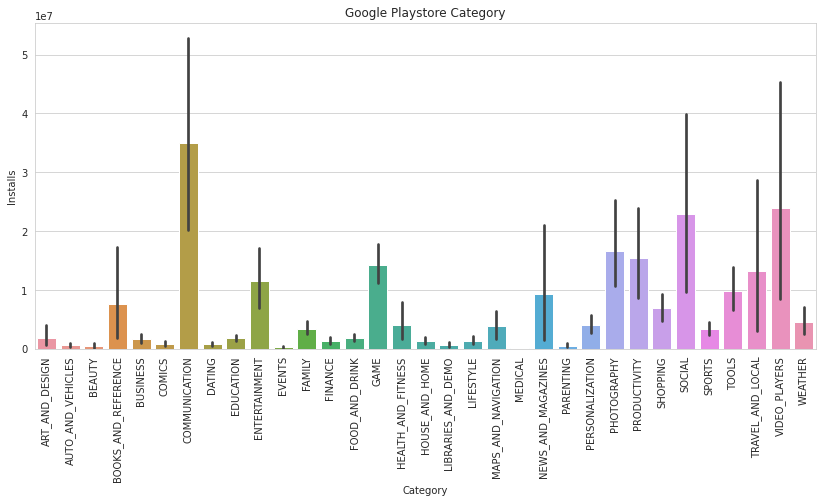

In [62]:
plt.figure(figsize=(14,6))

category_df = google_playstore_apps_df.Category.sort_values(ascending=True)

sns.barplot(x = category_df, y = 'Installs', data = google_playstore_apps_df);
plt.title('Google Playstore Category')
plt.xticks(rotation = 90)
plt.xlabel('Category')
plt.ylabel('Installs')
plt.show()

The apps in Communication category were installed most number of time followed by Video Players, Social, Photography, Productivity and Game.

### Size

Text(0.5, 1.0, 'App Size Distribution ')

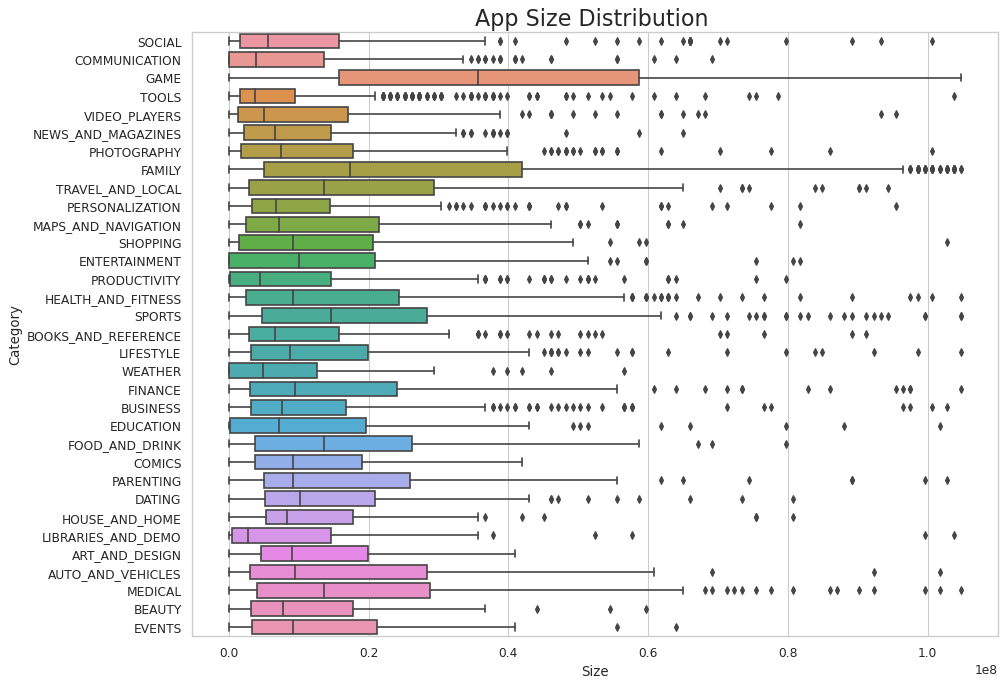

In [63]:
size_df = google_playstore_apps_df.groupby(['Category','App'])['Size'].sum().sort_values(ascending = False).reset_index()

plt.figure(figsize=(13,10), dpi= 80)
sns.set_context("notebook")
ax = sns.boxplot(x=google_playstore_apps_df['Size'],y=google_playstore_apps_df['Category'], data= size_df , notch=False)
ax.set_title('App Size Distribution ' , size = 20)

The apps in Gaming, Family category have the larger size, whereas apps in the Weather, Libraries and Demo has the lowest size.

Text(0.5, 1.0, 'Count of applications with respect to Size')

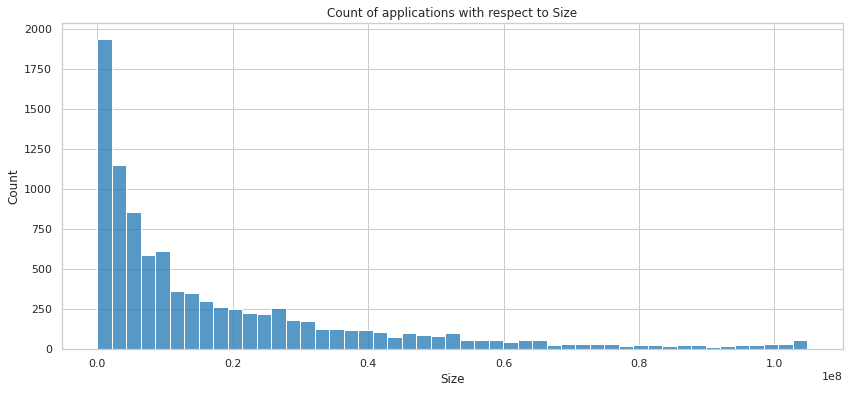

In [64]:
plt.subplots(figsize=(14, 6))
sns.histplot(x=google_playstore_apps_df['Size'])
plt.title('Count of applications with respect to Size')

From the above graph, we can see that the Size of Apps is inversely proportional to number of Count.

### Type

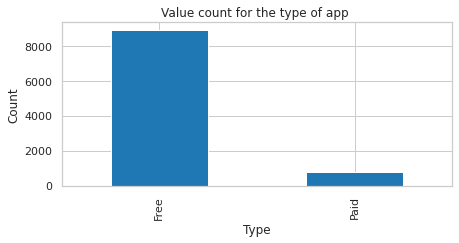

In [65]:
plt.figure(figsize=(7,3))
google_playstore_apps_df["Type"].value_counts().plot.bar()
plt.ylabel("Count")
plt.xlabel("Type")
plt.title("Value count for the type of app ")
plt.show()

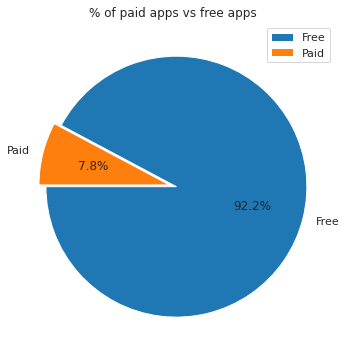

In [66]:
plt.figure(figsize=(12,6))
plt.title("% of paid apps vs free apps")
plt.pie(google_playstore_apps_df.Type.value_counts(), 
            explode=(0.030,0.025), 
            labels=google_playstore_apps_df.Type.value_counts().index 
            ,autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

From the above graph, we can see 7.8 % apps belong to Paid type while the rest 92.2 % apps belong to Free type.

### Content Rating

In [67]:
content_ratings_df = google_playstore_apps_df['Content Rating'].sort_values(ascending=True)
content_ratings_df

2591    Adults only 18+
3488    Adults only 18+
1947    Adults only 18+
4823           Everyone
6257           Everyone
             ...       
3479               Teen
7688               Teen
0                  Teen
9015            Unrated
4712            Unrated
Name: Content Rating, Length: 9648, dtype: object

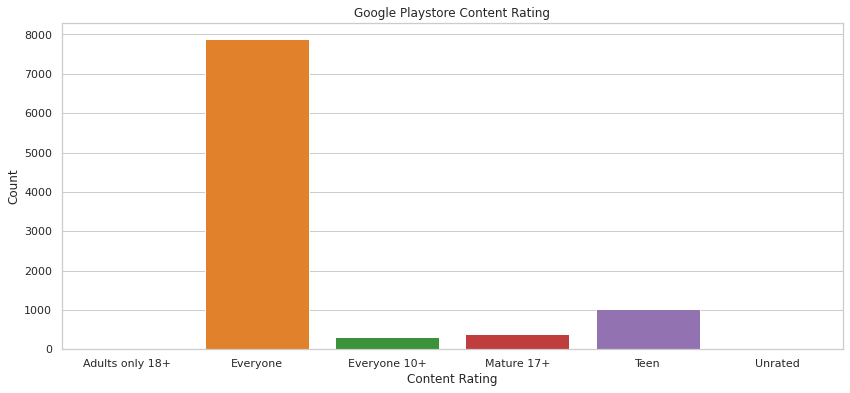

In [68]:
plt.figure(figsize=(14,6))

sns.countplot(x = content_ratings_df);
plt.title('Google Playstore Content Rating')
plt.xticks(rotation = 0)
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.show()

In [69]:
content_rating_df = google_playstore_apps_df['Content Rating'].value_counts()
content_rating_df

Everyone           7893
Teen               1036
Mature 17+          393
Everyone 10+        321
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

<AxesSubplot:title={'center':'% of apps under Content Rating'}, ylabel='Content Rating'>

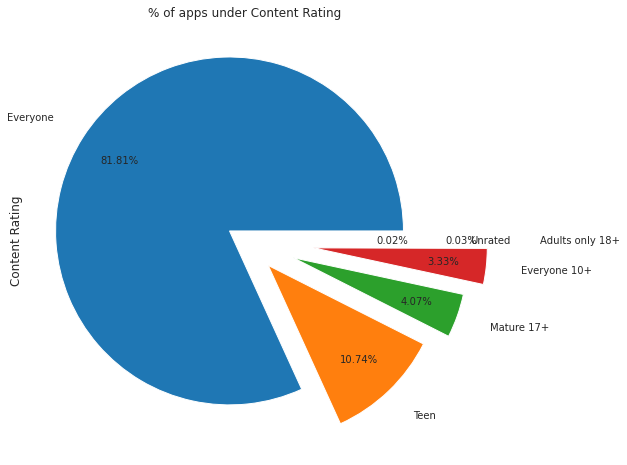

In [70]:
plt.figure(figsize=(14,8))
plt.title("% of apps under Content Rating")
content_rating_df.plot(kind='pie', fontsize=10, explode= (0.1,0.2,0.3,0.4,0.5,0.1), 
                       autopct='%1.2f%%', pctdistance=0.75, labeldistance=1.2)

From the above graph, we can see major part is covered by Everyone (81.81 %) followed by Teen (10.74 %), Mature 17+ (4.07 %), Everyone 10+ (3.33 %) which is the minor part according number of apps available in the dataset. 

### Correlation

The greater the absolute value of the correlation coefficient, the stronger the relationship and the sign of the correlation coefficient represents the direction of the relationship.

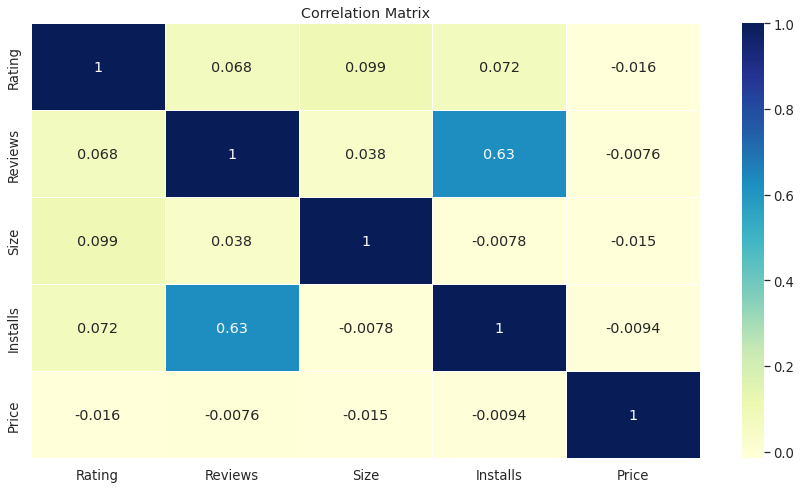

In [71]:
plt.figure(figsize = (15,8))
sns.set(font_scale= 1.2)
sns.heatmap(google_playstore_apps_df.corr(), annot=True, linewidths=.5, cmap="YlGnBu")
plt.title('Correlation Matrix');

The above correlation coefficients can be interpreted as Installs and Reviews are dependent on each other followed by Size and Rating are slightly dependent on each other and Installs correlation with Rating.

## Asking and Answering Questions

Based on the above Exploratory Analysis and Visualization, we ask further questions over the obtained dataset.

### What are the Top  Apps with max rating ?

In [72]:
rating = google_playstore_apps_df.groupby(['Category','Installs', 'App'])['Rating'].sum().sort_values(ascending = False).reset_index()

In [73]:
toprating = rating[rating.Rating == 5.0]

In [74]:
toprating

,Category,Installs,App,Rating
0,GAME,10,Trovami se ci riesci,5.0
1,FAMILY,100,DH-UFO,5.0
2,FAMILY,100,Disciple Maker’s (DM) Lab,5.0
3,FAMILY,100,EC Calgary,5.0
4,FAMILY,100,Ek Qissa He Quran Se (Qurani Waqiyat),5.0
...,...,...,...,...
266,GAME,10,Monster Ride Pro,5.0
267,MEDICAL,10,PrimeDelivery,5.0
268,MEDICAL,500,FHR 5-Tier 2.0,5.0
269,MEDICAL,100,Zen Leaf,5.0


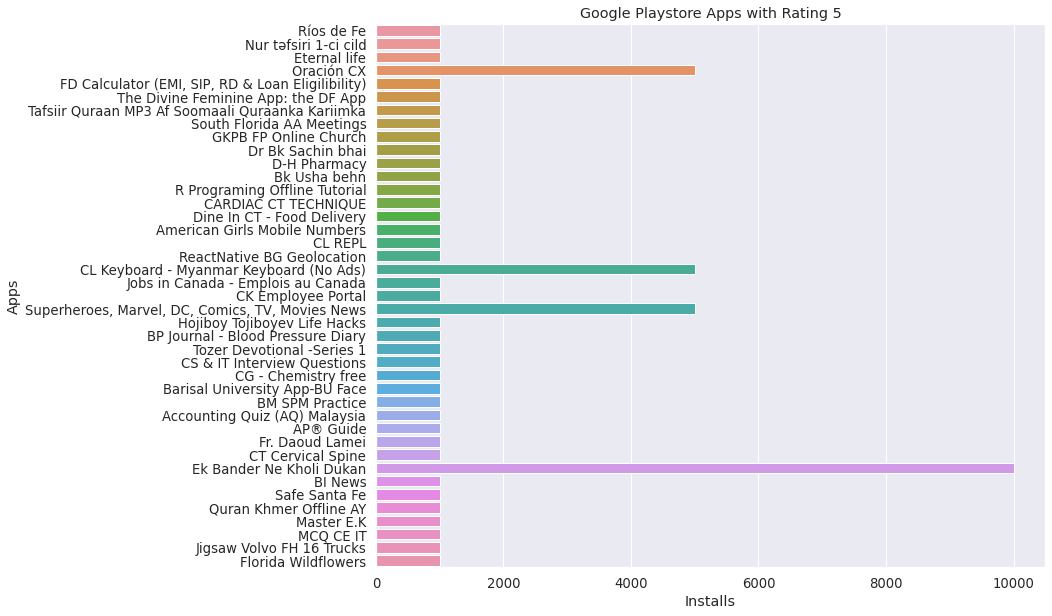

In [75]:
plt.figure(figsize=(12,10))
y_1 = toprating.App[(toprating.Installs>=1000)].sort_index(ascending=False)
x_1 = toprating.Installs
sns.barplot(x = x_1, y = y_1);
plt.title('Google Playstore Apps with Rating 5')
plt.xlabel('Installs')
plt.ylabel('Apps')
plt.show()

Ek Bander Ne Kholi Dukan, Oracion CX, CL Keyboard-Myanmar Keyboard(No Ads), Superheroes,Marvel,DC,Comics,TV,Movies News are the apps with Rating 5 with respective Installation record.

In [76]:
ratinge = google_playstore_apps_df.groupby(['Installs', 'App'])['Rating'].sum()

In [77]:
topratinge = ratinge.tail(15).sort_values(ascending=False).reset_index()

In [78]:
topratinge

,Installs,App,Rating
0,1000000000,Google Photos,4.5
1,1000000000,Instagram,4.5
2,1000000000,Subway Surfers,4.5
3,1000000000,WhatsApp Messenger,4.4
4,1000000000,Google Play Games,4.3
5,1000000000,Maps - Navigate & Explore,4.3
6,1000000000,YouTube,4.3
7,1000000000,Google Street View,4.2
8,1000000000,Google+,4.2
9,1000000000,Skype - free IM & video calls,4.1


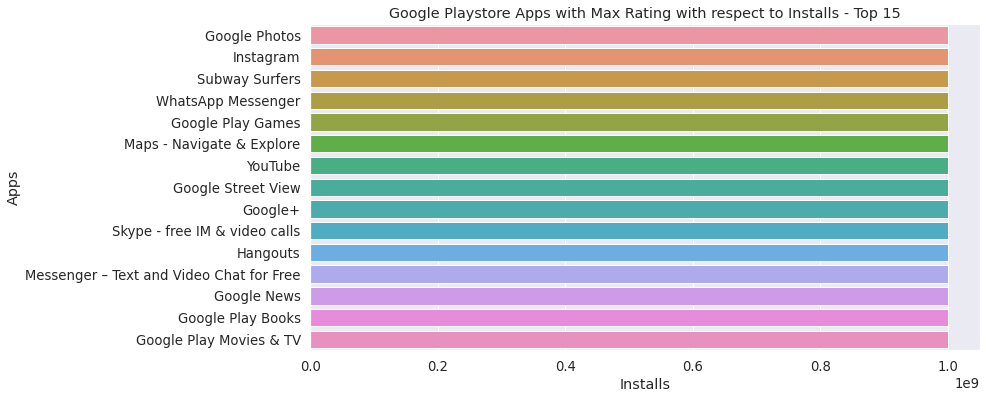

In [79]:
plt.figure(figsize=(12,6))
y_11 = topratinge.App
x_11 = topratinge.Installs
sns.barplot(x = x_11, y = y_11);
plt.title('Google Playstore Apps with Max Rating with respect to Installs - Top 15')
plt.xlabel('Installs')
plt.ylabel('Apps')
plt.show()

The above graph shows the Top 15 Apps Max Rating with respect to largest number of installations of the user.

### What are the most Expensive Apps ?

In [80]:
price = google_playstore_apps_df.groupby(['Category','Installs', 'App'])['Price'].sum().sort_values(ascending = False).reset_index()

In [81]:
topprice = price[price.Price >= 100.00]

In [82]:
topprice

,Category,Installs,App,Price
0,LIFESTYLE,10000,I'm Rich - Trump Edition,400.00
1,LIFESTYLE,0,I'm Rich/Eu sou Rico/أنا غني/我很有錢,399.99
2,LIFESTYLE,100000,I am rich,399.99
3,FAMILY,100,most expensive app (H),399.99
4,FINANCE,50000,I Am Rich Premium,399.99
5,FINANCE,1000,I AM RICH PRO PLUS,399.99
6,FINANCE,5000,I am rich(premium),399.99
7,FINANCE,5000,I am Rich,399.99
8,FINANCE,1000,I am rich (Most expensive app),399.99
9,FAMILY,5000,I Am Rich Pro,399.99


The above list consists the most expensive top 20 apps.

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


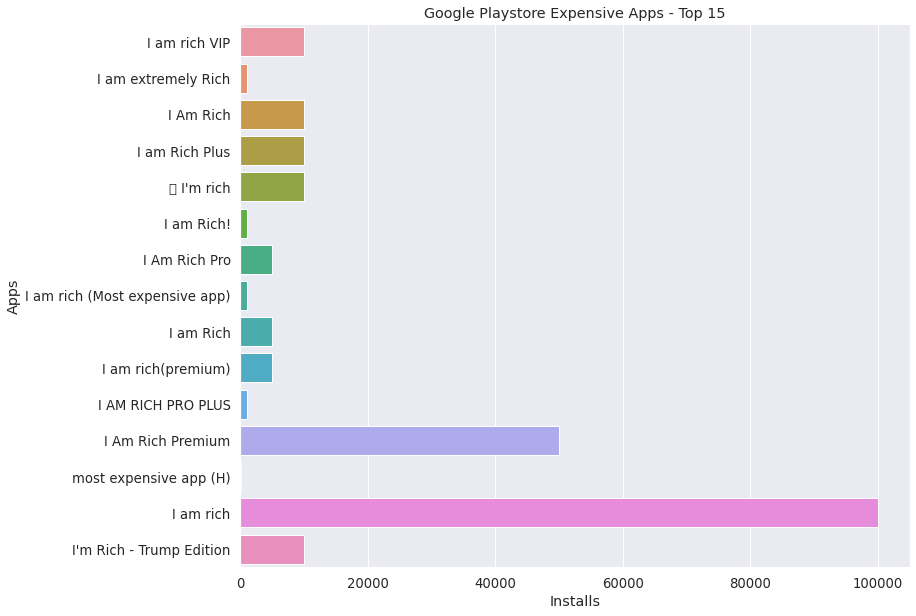

In [83]:
plt.figure(figsize=(12,10))
y_2 = topprice.App[(topprice.Installs>=100)].sort_index(ascending=False).head(15)
x_2 = topprice.Installs
sns.barplot(x = x_2, y = y_2);
plt.title('Google Playstore Expensive Apps - Top 15')
plt.xlabel('Installs')
plt.ylabel('Apps')
plt.show()

I am rich, I Am Rich Premium, I'm Rich - Trump Edition etc. are the most expensive apps with high Installation record.

### What are the Top Genres with respect to Installs ?

In [84]:
genres = google_playstore_apps_df.Genres.value_counts().head(15)
genres

Tools               826
Entertainment       560
Education           509
Business            420
Medical             395
Personalization     374
Productivity        374
Lifestyle           368
Finance             345
Sports              331
Communication       315
Action              299
Health & Fitness    288
Photography         281
News & Magazines    254
Name: Genres, dtype: int64

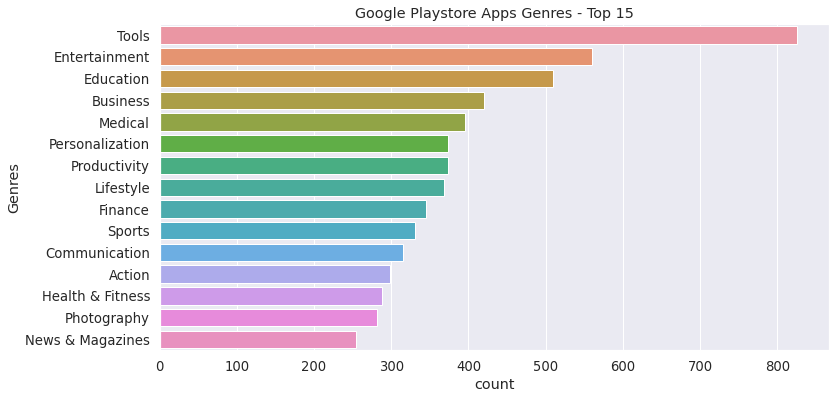

In [85]:
plt.figure(figsize=(12,6))
y_3 = genres.index
x_3 = genres
sns.barplot(x = x_3, y = y_3);
plt.title('Google Playstore Apps Genres - Top 15')
plt.xlabel('count')
plt.ylabel('Genres')
plt.show()

Looks like Most of the Apps in play store are Tools Genres followed by Entertainment, Education, Business and Medical.

In [86]:
topgenres = google_playstore_apps_df.groupby(['Genres'])['Installs'].sum().sort_values(ascending = False).reset_index()

In [87]:
topgenres.head(15)

,Genres,Installs
0,Communication,11038276251
1,Tools,8092271905
2,Productivity,5793091369
3,Social,5487867902
4,Photography,4658147655
5,Video Players & Editors,3916902720
6,Arcade,3755129155
7,Action,3483039190
8,Casual,3052830740
9,Entertainment,3014704684


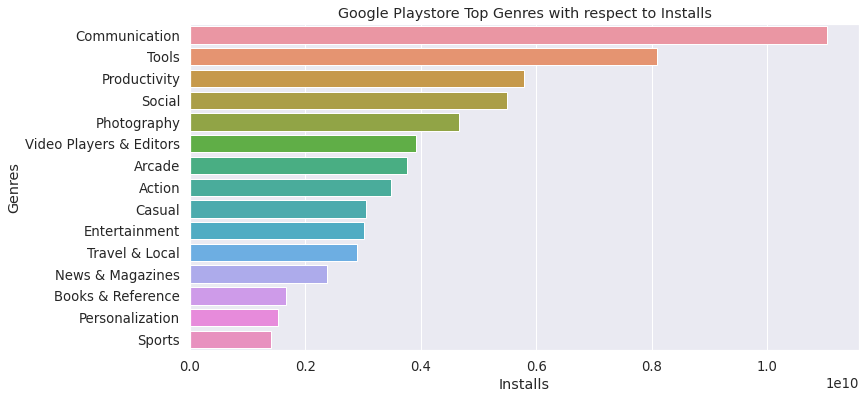

In [88]:
plt.figure(figsize=(12,6))
y_4 = topgenres.Genres.head(15)
x_4 = topgenres.Installs
sns.barplot(x = x_4, y = y_4);
plt.title('Google Playstore Top Genres with respect to Installs')
plt.xlabel('Installs')
plt.ylabel('Genres')
plt.show()

The apps in Communication category were installed most number of time followed by Tools, Productivity, Social and Photography.

### Which App has the largest number of Installs ?

In [89]:
top_app_installs = google_playstore_apps_df.groupby(['App'])['Installs'].sum().sort_values(ascending = False).reset_index().head(10)

In [90]:
top_app_installs

,App,Installs
0,YouTube,1000000000
1,Facebook,1000000000
2,Google,1000000000
3,Google Chrome: Fast & Secure,1000000000
4,Google Drive,1000000000
5,Google News,1000000000
6,Google Photos,1000000000
7,Google Play Books,1000000000
8,Google Play Games,1000000000
9,Google Play Movies & TV,1000000000


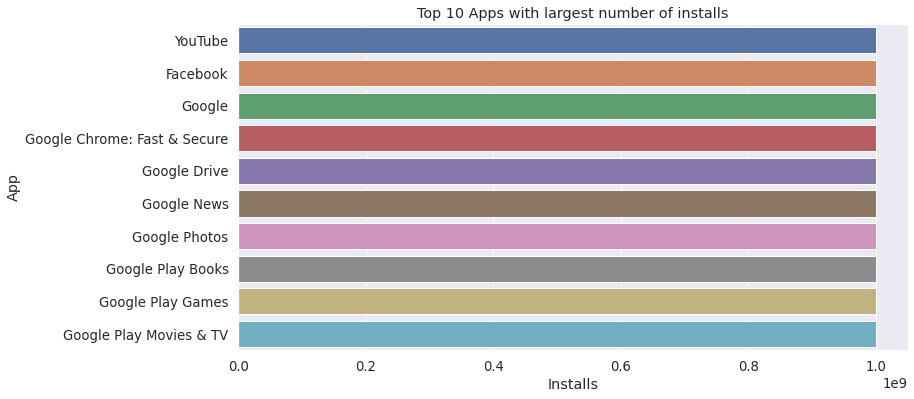

In [91]:
plt.figure(figsize=(12,6))
y_5 = top_app_installs.App
x_5 = top_app_installs.Installs
sns.barplot(x = x_5, y = y_5);
plt.title('Top 10 Apps with largest number of installs')
plt.xlabel('Installs')
plt.ylabel('App')
plt.show()

The above graph shows the Top 10 Apps with the largest number of installations of the user.

### Which App has the most number of Reviews ?

In [92]:
most_no_of_reviews = google_playstore_apps_df.groupby(['App'])['Reviews'].mean().sort_values(ascending = False).reset_index().head(10)

In [93]:
most_no_of_reviews

,App,Reviews
0,Facebook,78158306.0
1,WhatsApp Messenger,69119316.0
2,Instagram,66577446.0
3,Messenger – Text and Video Chat for Free,56646578.0
4,Clash of Clans,44893888.0
5,Clean Master- Space Cleaner & Antivirus,42916526.0
6,Subway Surfers,27725352.0
7,YouTube,25655305.0
8,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0
9,Clash Royale,23136735.0


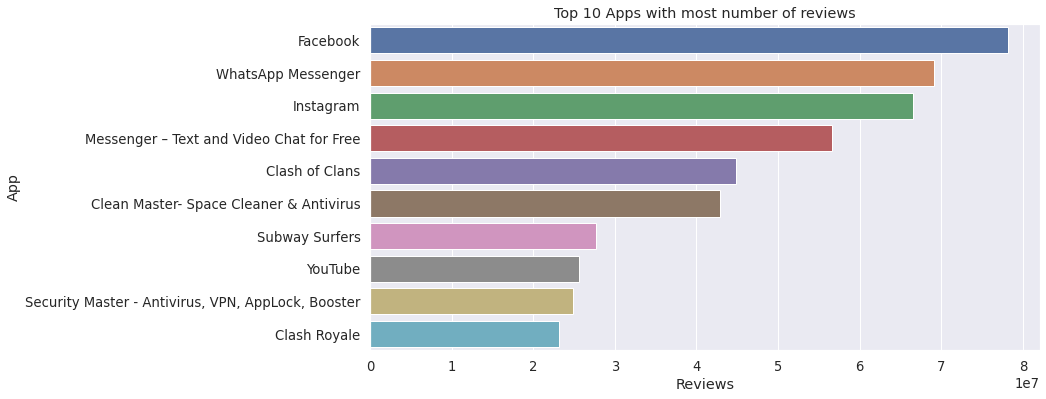

In [94]:
plt.figure(figsize=(12,6))
y_6 = most_no_of_reviews.App
x_6 = most_no_of_reviews.Reviews
sns.barplot(x = x_6, y = y_6);
plt.title('Top 10 Apps with most number of reviews')
plt.xlabel('Reviews')
plt.ylabel('App')
plt.show()

Facebook, WhatsApp and Instagram has the most number of Reviews in Google Playstore followed by Messenger – Text and Video Chat for Free, Clash of Clans, Clean Master- Space Cleaner & Antivirus and Subway Surfers.

## Inferences and Conclusion

Google Playstore typically organize the apps they offer based on: the function(s) provided by the app (including games, multimedia or productivity), the device for which the app was designed, and the operating system on which the app will run.
Playstore typically provide a way for users to give reviews and ratings. Those reviews are useful for other users, for developers and for app store owners. Users can select the best apps based on ratings, developers get feedback on what features are praised or disliked, and finally, app store owners can detect bad apps and malicious developers by automatically analyzing the reviews with data mining techniques.

In this notebook we have done Exploratory Data Analysis on Google Play Store Apps dataset, we have drawn interesting inferences from this dataset.
* Based on the dataset we can infer that most of the Apps in the play store belongs to Family and Gaming categories followed by Tools, Medical and Business.
* Also based on the type metric it seems that only 7.8 % of apps are paid and around 92.2 % of apps are free to install.
* It is observed that a certain app category has more free apps available for download than others. In our dataset, the majority of apps in Family, Game, Tools, as well as Business categories were free to install. At the same time Family, Game, Tools, Medical and Personalization categories had the biggest number of paid apps available for download.
* From the ratings it appears that people tend to give ratings in the range of 2.8 to 4.8.
* As far as genre is concerned, then most of the Apps are from Tools Genres followed by Entertainment, Education and Business.
* From Content Ratings we can infer that the 81.81 % of the Apps are targeted to everyone.
* The apps in Gaming, Family category have the larger size, whereas apps in the Weather, Libraries and Demo has the lowest size that is the Size of Apps is inversely proportional to number of Count.
* The apps in Communication category were installed most number of time followed by Tools, Productivity, Social and Photography.
* Based on the number of installs, YouTube app installed number of time followed by Facebook, Google	and Google Chrome: Fast & Secure.
* Based on the reviews, Facebook, WhatsApp and Instagram has the most number of Reviews in Google Playstore followed by Messenger – Text and Video Chat for Free, Clash of Clans, Clean Master- Space Cleaner & Antivirus and Subway Surfers.

## Future Work

* Exploring reviews and sentiment of the users as per the the category of the application.
* More Data Visualization study.

## References

* https://www.kaggle.com/lava18/google-play-store-apps
* https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas
* https://matplotlib.org/stable/index.html
* https://seaborn.pydata.org/examples/index.html

In [95]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>